In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

In [19]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=["sepal_length","sepal_width","petal_length","petal_width","target"])
df.head()


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


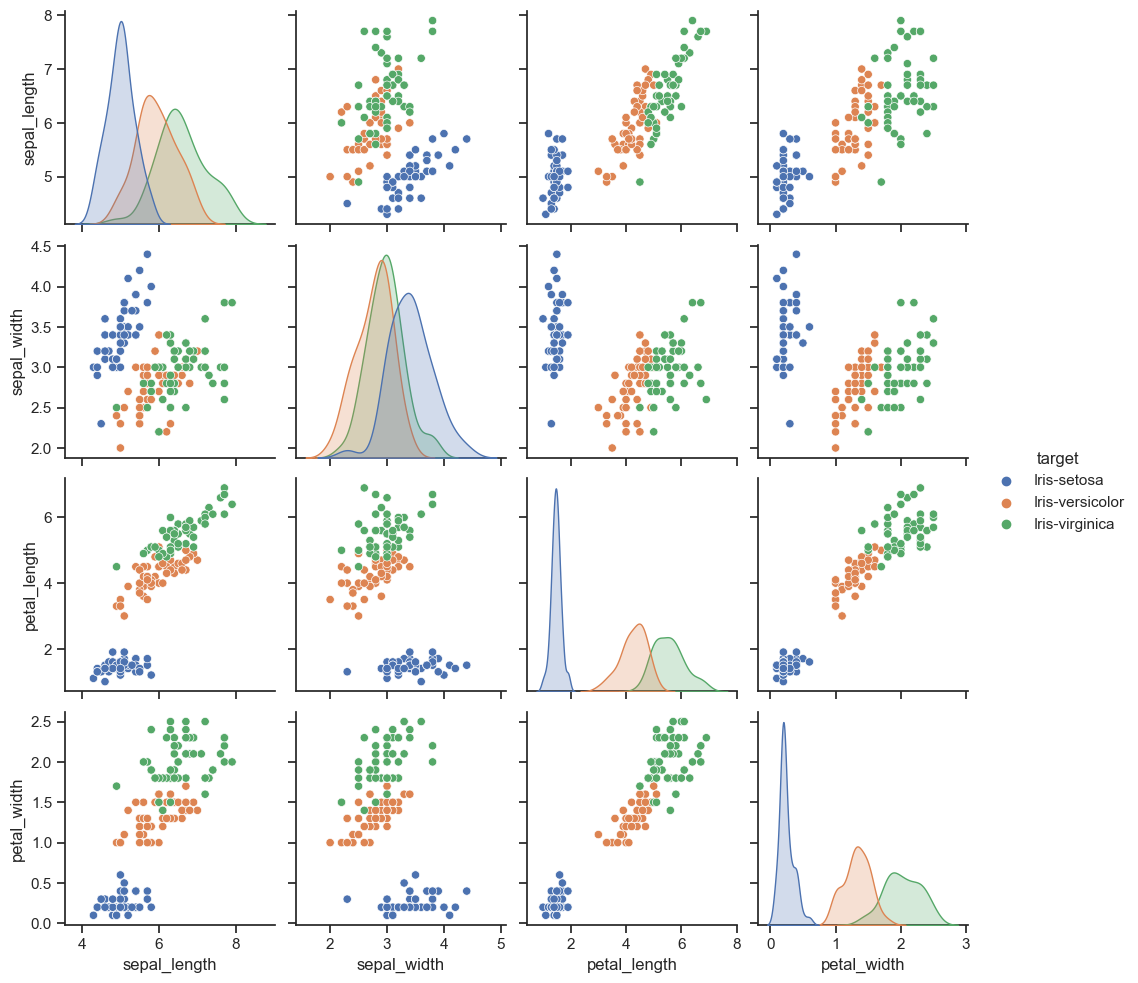

In [20]:
sns.set_theme(style="ticks")
sns.pairplot(df, hue="target")

<AxesSubplot:>

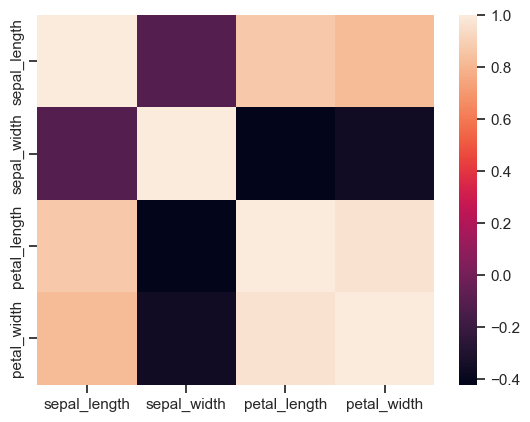

In [21]:
sns.heatmap(df.iloc[:,0:4].corr())

# Padronização

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html


In [22]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

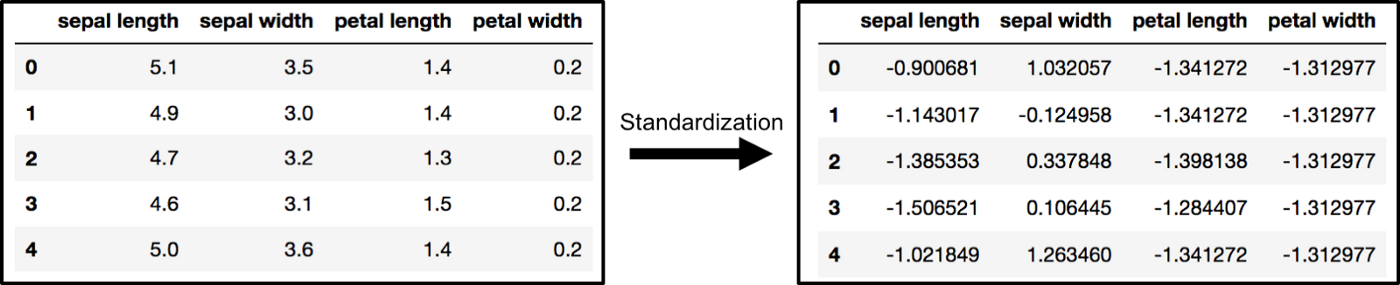

In [23]:
pca = PCA(n_components = 4)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ["PC1", "PC2","PC3","PC4"])

In [24]:
principalDf

,PC1,PC2,PC3,PC4
0,-2.264542,0.505704,-0.121943,-0.023073
1,-2.086426,-0.655405,-0.227251,-0.103208
2,-2.367950,-0.318477,0.051480,-0.027825
3,-2.304197,-0.575368,0.098860,0.066311
4,-2.388777,0.674767,0.021428,0.037397
...,...,...,...,...
145,1.870522,0.382822,0.254532,-0.388890
146,1.558492,-0.905314,-0.025382,-0.221322
147,1.520845,0.266795,0.179277,-0.118903
148,1.376391,1.016362,0.931405,-0.024146


In [25]:
pca.explained_variance_ratio_


array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [10]:
# Avaliando a variação acumulada dos dois PC
sum(pca.explained_variance_ratio_[0:2])*100

95.80097536148199

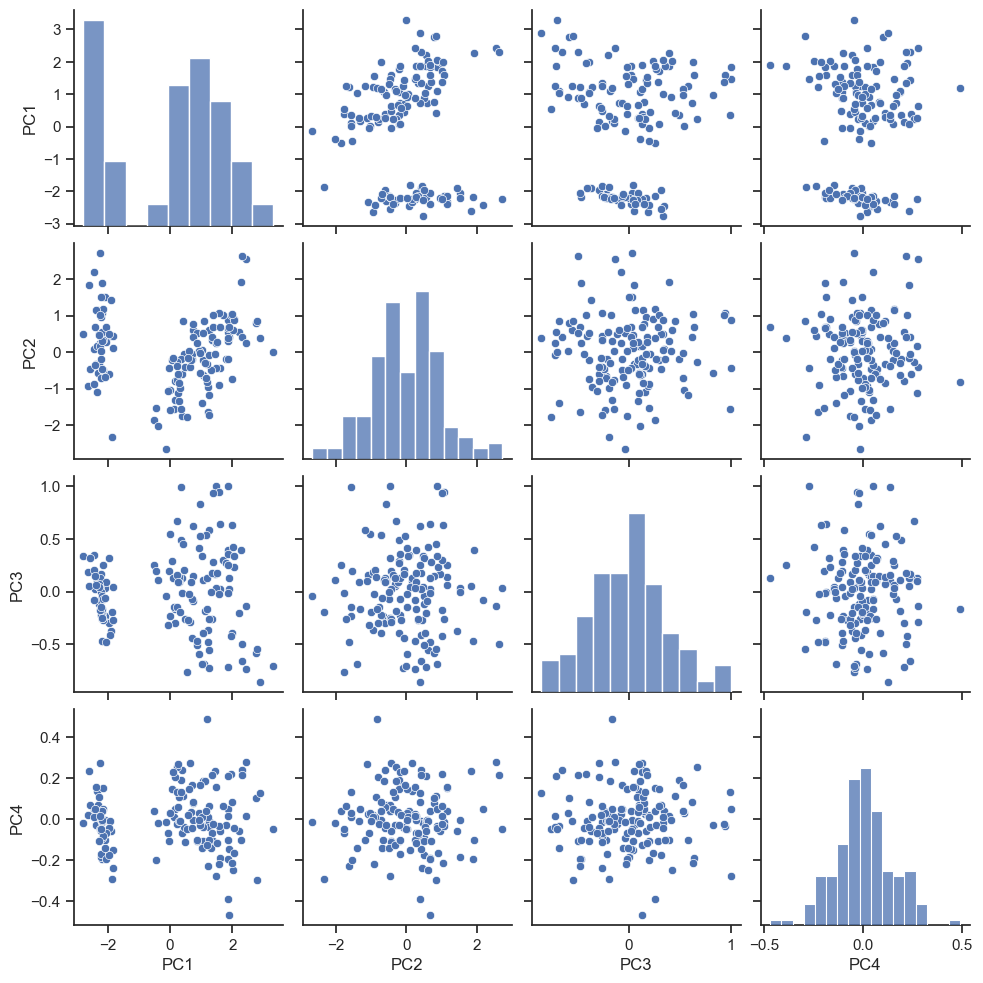

In [11]:
sns.set_theme(style="ticks")
sns.pairplot(principalDf)

<AxesSubplot:>

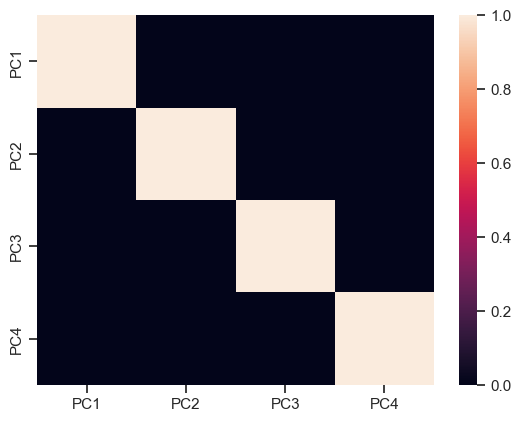

In [12]:
sns.heatmap(principalDf.corr())

In [26]:
loadings = pd.DataFrame(pca.components_.T, columns=["PC1", "PC2","PC3","PC4"], index=df.columns[:-1])
loadings

,PC1,PC2,PC3,PC4
sepal_length,0.522372,0.372318,-0.721017,-0.261996
sepal_width,-0.263355,0.925556,0.242033,0.124135
petal_length,0.581254,0.021095,0.140892,0.801154
petal_width,0.565611,0.065416,0.633801,-0.523546


# Visualizando

In [27]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

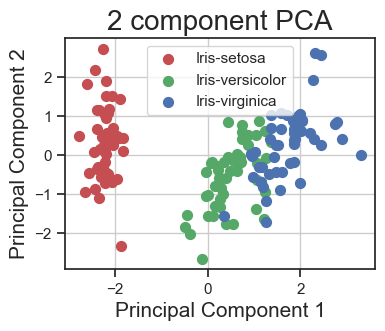

In [30]:
fig = plt.figure(figsize = (4,3))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep,"PC1"]
               , finalDf.loc[indicesToKeep, "PC2"]
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()